<a href="https://colab.research.google.com/github/rahul94jh/MSC-Research/blob/main/learning_tf_dataset_reading_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Imports

In [ ]:
import os, sys, math
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
print("Tensorflow version " + tf.__version__)
AUTO = tf.data.experimental.AUTOTUNE # used in tf.data.Dataset API

Tensorflow version 2.4.1


#Configuration

In [ ]:
PATH_PATTERN = '/content/drive/MyDrive/Colab Notebooks/clickbait_detection/thumbnails/*/*.jpg'
PATH_OUTPUT = '/content/drive/MyDrive/Colab Notebooks/clickbait_detection/root_dataset/tfrec_image_data'
CLASSES = [b'clickbaits', b'nonclickbaits'] # image labels (folder names in the data)

In [ ]:
#@title "display utilities [RUN ME]"
def display_9_images_from_dataset(dataset):
  plt.figure(figsize=(13,13))
  subplot=331
  for i, (image, label) in enumerate(dataset):
    plt.subplot(subplot)
    plt.axis('off')
    plt.imshow(image.numpy().astype(np.uint8))
    plt.title(label.numpy().decode("utf-8"), fontsize=16)
    subplot += 1
    if i==8:
      break
  plt.tight_layout()
  plt.subplots_adjust(wspace=0.1, hspace=0.1)
  plt.show()

#Read images and labels


1. Use `fileset=`[`tf.data.Dataset.list_files`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#list_files) to scan the data folder
1. Iterate through the dataset of filenames: `for filename in fileset:...` . 
 * Does it work ? Yes, but if you print the filename you get Tensors containing strings.
 * To display the string only, you can use filename.numpy(). This works on any Tensorflow tensor.
 * tip: to limit the size of the dataset for display, you can use [`Dataset.take()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take). Like this: `for data in dataset.take(10): ....`
1. Use [`tf.data.Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) to decode the JPEG files. You will find useful TF code snippets below.
 * Iterate on the image dataset. You can use .numpy().shape to only see the data sizes.
  * Are all images of the same size ?
1. Now create a training dataset: you have images but you also need labels:
 *  the labels (flower names) are the directory names. You will find useful TF code snippets below for parsing them.
 * If you do "`return image, label`" in the decoding function, you will have a Dataset of pairs (image, label).
1. You can see the flowers and their labels with the `display_9_images_from_dataset` function. It expects the Dataset to have `(image, label)` elements.

In [ ]:
nb_images = len(tf.io.gfile.glob(PATH_PATTERN))
print("Pattern matches {} images.".format(nb_images))

filenames_dataset = tf.data.Dataset.list_files(PATH_PATTERN)

for filename in filenames_dataset.take(10):
  print(filename.numpy())

Pattern matches 15335 images.
b'/content/drive/MyDrive/Colab Notebooks/clickbait_detection/thumbnails/nonclickbaits/IhS11wGAAHE_mqdefault.jpg'
b'/content/drive/MyDrive/Colab Notebooks/clickbait_detection/thumbnails/nonclickbaits/XcankE2_sYA_mqdefault.jpg'
b'/content/drive/MyDrive/Colab Notebooks/clickbait_detection/thumbnails/nonclickbaits/Lz7S4tCQhvo_mqdefault.jpg'
b'/content/drive/MyDrive/Colab Notebooks/clickbait_detection/thumbnails/nonclickbaits/1i-eH1qbXRA_mqdefault.jpg'
b'/content/drive/MyDrive/Colab Notebooks/clickbait_detection/thumbnails/nonclickbaits/mQ0hS7l9ckY_mqdefault.jpg'
b'/content/drive/MyDrive/Colab Notebooks/clickbait_detection/thumbnails/clickbaits/WjzmYW4Rzfg_mqdefault.jpg'
b'/content/drive/MyDrive/Colab Notebooks/clickbait_detection/thumbnails/nonclickbaits/wXmzpFoHkfA_mqdefault.jpg'
b'/content/drive/MyDrive/Colab Notebooks/clickbait_detection/thumbnails/nonclickbaits/FyERNitCMtk_mqdefault.jpg'
b'/content/drive/MyDrive/Colab Notebooks/clickbait_detection/thumbnai

In [ ]:
def decode_jpeg(filename):
  bits = tf.io.read_file(filename)
  image = tf.image.decode_jpeg(bits)
  return image

image_dataset = filenames_dataset.map(decode_jpeg)
for images in image_dataset.take(5):
  print(images)

In [ ]:
def decode_jpeg_and_label(filename):
  bits = tf.io.read_file(filename)
  image = tf.image.decode_jpeg(bits)
  label = tf.strings.split(tf.expand_dims(filename, axis=-1), sep='/')
  label = label.values[-2]
  return image, label

dataset = filenames_dataset.map(decode_jpeg_and_label)
for image, label in dataset.take(10):
  print(image.numpy().shape, label.numpy().decode('utf-8'))

(180, 320, 3) nonclickbaits
(180, 320, 3) clickbaits
(180, 320, 3) clickbaits
(180, 320, 3) clickbaits
(180, 320, 3) clickbaits
(180, 320, 3) nonclickbaits
(180, 320, 3) clickbaits
(180, 320, 3) nonclickbaits
(180, 320, 3) clickbaits
(180, 320, 3) nonclickbaits


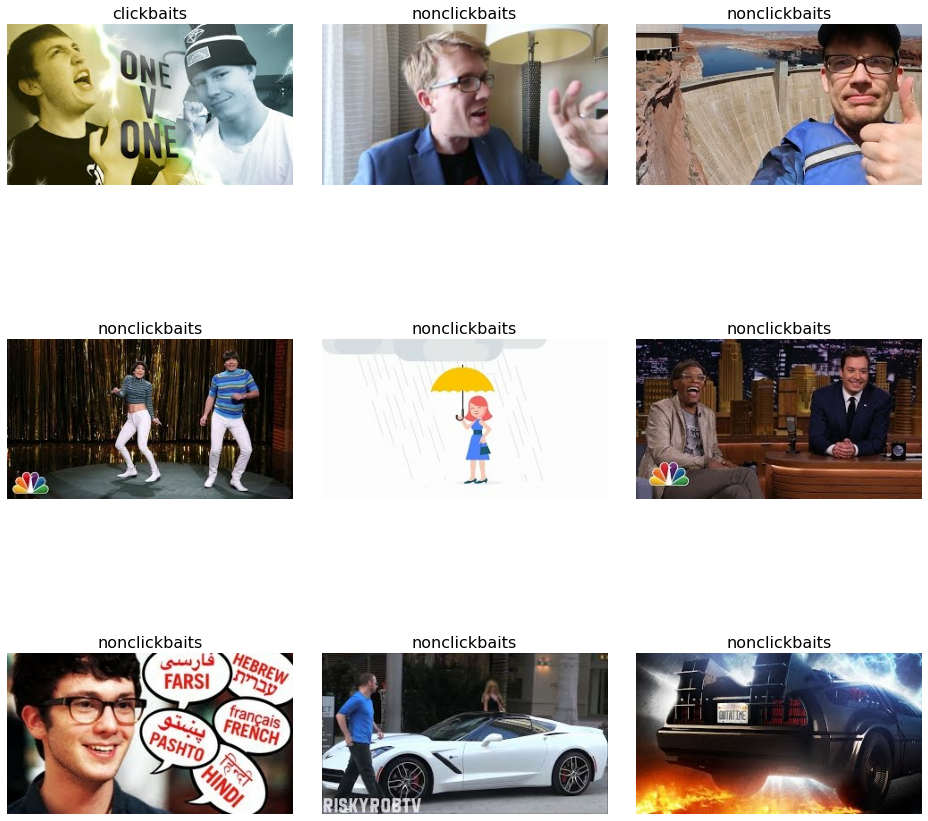

In [ ]:
display_9_images_from_dataset(dataset)